In [1]:
import re
import matplotlib.pyplot as plt

pt: 0.052780
пл: 0.041991
ями: 0.037594
млвц: 0.034981
артфк: 0.035323
лвафолрипждф: 0.033577
лдожйцкождзхлфв: 0.033204
иобямжощцплмдзаркд: 0.032108


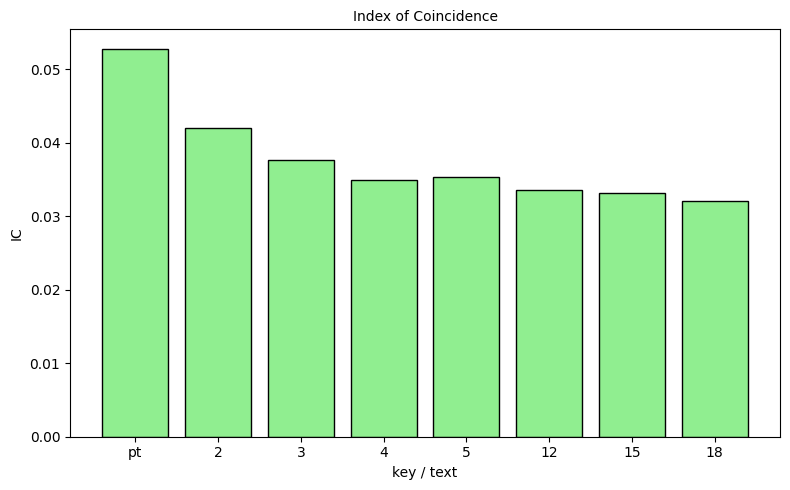

In [2]:
def filter(text):
    text = text.lower()
    text = text.replace('ё', 'е')
    text = re.sub(r'[^а-я ]', ' ', text)
    text = re.sub(r' ', '', text)
    text = text.strip()
    return text


def encrypt(plain, k):
    ct = []
    r = len(k)
    for i, ch in enumerate(plain):
        x = bt.index(ch)
        y = bt.index(k[i % r])
        ct.append(bt[(x + y) % 32])
    return ''.join(ct)


def IC(text):
    n = len(text)
    freqs = {}
    for ch in text:
        freqs[ch] = freqs.get(ch, 0) + 1
    numer = sum(v * (v - 1) for v in freqs.values())
    denum = n * (n - 1)
    return numer / denum


bt = "абвгдежзийклмнопрстуфхцчшщыьъэюя"
keys = ["пл", "ями", "млвц", "артфк","лвафолрипждф", "лдожйцкождзхлфв", "иобямжощцплмдзаркд"]
with open('text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
plain = filter(text)


enc = {}
for key in keys:
    ct = encrypt(plain, key)
    r = len(key)
    filename = f'encrypted_{r}.txt'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(ct)
    enc[key] = ct


result = {}
result['pt'] = IC(plain)
for key, ct in enc.items():
    result[key] = IC(ct)

for k, v in result.items():
    print(f'{k}: {v:.6f}')

plt.figure(figsize=(8, 5))
x = ['pt' if k == 'pt' else str(len(k)) for k in result.keys()]
plt.bar(x, result.values(), color="lightgreen", edgecolor="black")
plt.title("Index of Coincidence", fontsize=10)
plt.xlabel("key / text", fontsize=10)
plt.ylabel("IC", fontsize=10)
plt.tight_layout()
plt.show()